### Importación de Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Datos Reales

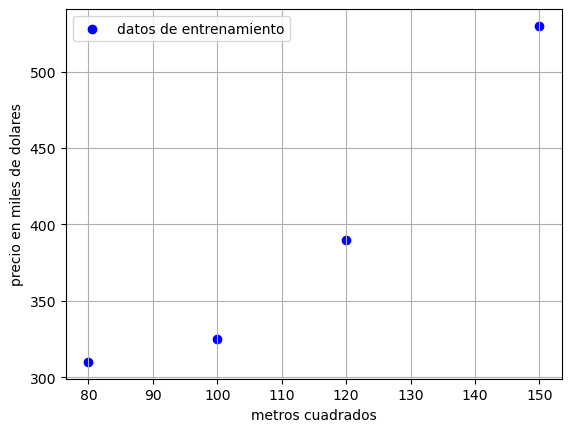

In [4]:
X = np.array([
    [80, 3], 
    [120, 3],
    [100, 2],
    [150, 4]])
y = np.array([310, 390, 325,530])

plt.scatter(X[:,0], y, color='blue')
plt.xlabel('metros cuadrados')
plt.ylabel('precio en miles de dolares')
plt.legend(['datos de entrenamiento'])
plt.grid()
plt.show()

### Datos Calculados

In [ ]:
X_bias= np.c_[np.ones(X.shape[0]), X]  # Agregar término de sesgo (bias)
print(X_bias)

[[  1.  80.   3.]
 [  1. 120.   3.]
 [  1. 100.   2.]
 [  1. 150.   4.]]


### Definiciones de $A= X^T X$ y $b = X^T y$

In [11]:
A=X_bias.T @ X_bias
b=X_bias.T @ y

print(f"Matriz A:{A}")
print(f"Vector b:{b}")
print(f'El determinante de A:{np.linalg.det(A):.2f}')
print(f'Rango de A:{np.linalg.matrix_rank(A)}')
print(f'La forma de A:{A.shape}') 
print(f'La inversa de A:\n{np.linalg.inv(A)}')  

Matriz A:[[4.00e+00 4.50e+02 1.20e+01]
 [4.50e+02 5.33e+04 1.40e+03]
 [1.20e+01 1.40e+03 3.80e+01]]
Vector b:[  1555. 183600.   4870.]
El determinante de A:11400.00
Rango de A:3
La forma de A:(3, 3)
La inversa de A:
[[ 5.73684211e+00 -2.63157895e-02 -8.42105263e-01]
 [-2.63157895e-02  7.01754386e-04 -1.75438596e-02]
 [-8.42105263e-01 -1.75438596e-02  9.38596491e-01]]


### Cálculo de $\theta$ usando la inversa de A

In [17]:
theta = np.round(np.linalg.inv(A) @ b, decimals=2)
print(f'Los coeficientes estimados son: {theta}')

Los coeficientes estimados son: [-11.84   2.48  40.44]


### Cálculo de $\theta$ usando .solve()

In [16]:
theta_solve = np.round(np.linalg.solve(A, b), decimals=2)
print(f'Los coeficientes estimados con linalg.solve son: {theta_solve}')

Los coeficientes estimados con linalg.solve son: [-11.84   2.48  40.44]


### Comparación de Resultados Predichos con Datos Reales

In [20]:
### Comparación de Resultados Predichos con Datos Real
y_pred = X_bias @ theta
print(f'Valores reales: {y}')
print(f'Valores predichos: {y_pred}')

Valores reales: [310 390 325 530]
Valores predichos: [307.88 407.08 317.04 521.92]


### Gráfica del Modelo de Regresión Lineal vs. datos Reales

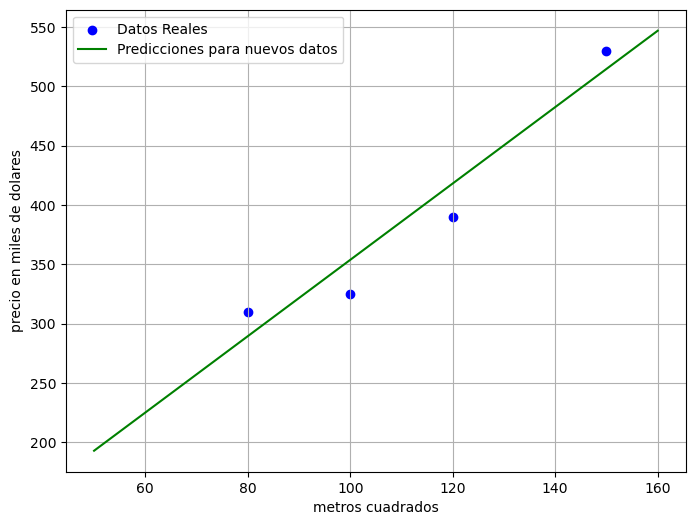

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color='blue', label='Datos Reales')
X_mt2 = np.array([[50], [160]] )
nu_habitaciones = np.array([[2], [4]] )
X_bias= np.c_[np.ones(X_mt2.shape[0]), X_mt2, nu_habitaciones]  # Agregar término de sesgo (bias)
y_pred2 = X_bias @ theta
plt.plot(X_mt2[:,0], y_pred2, color='green', label='Predicciones para nuevos datos')
plt.xlabel('metros cuadrados')
plt.ylabel('precio en miles de dolares')
plt.legend()
plt.grid()
plt.show()